In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn
plt.rcParams['figure.figsize'] = 18, 18

In [7]:
data = pd.read_csv('./credit_card_default.csv')

target = data['default_pay']
train = data.copy().drop(['default_pay','ID'], axis=1)

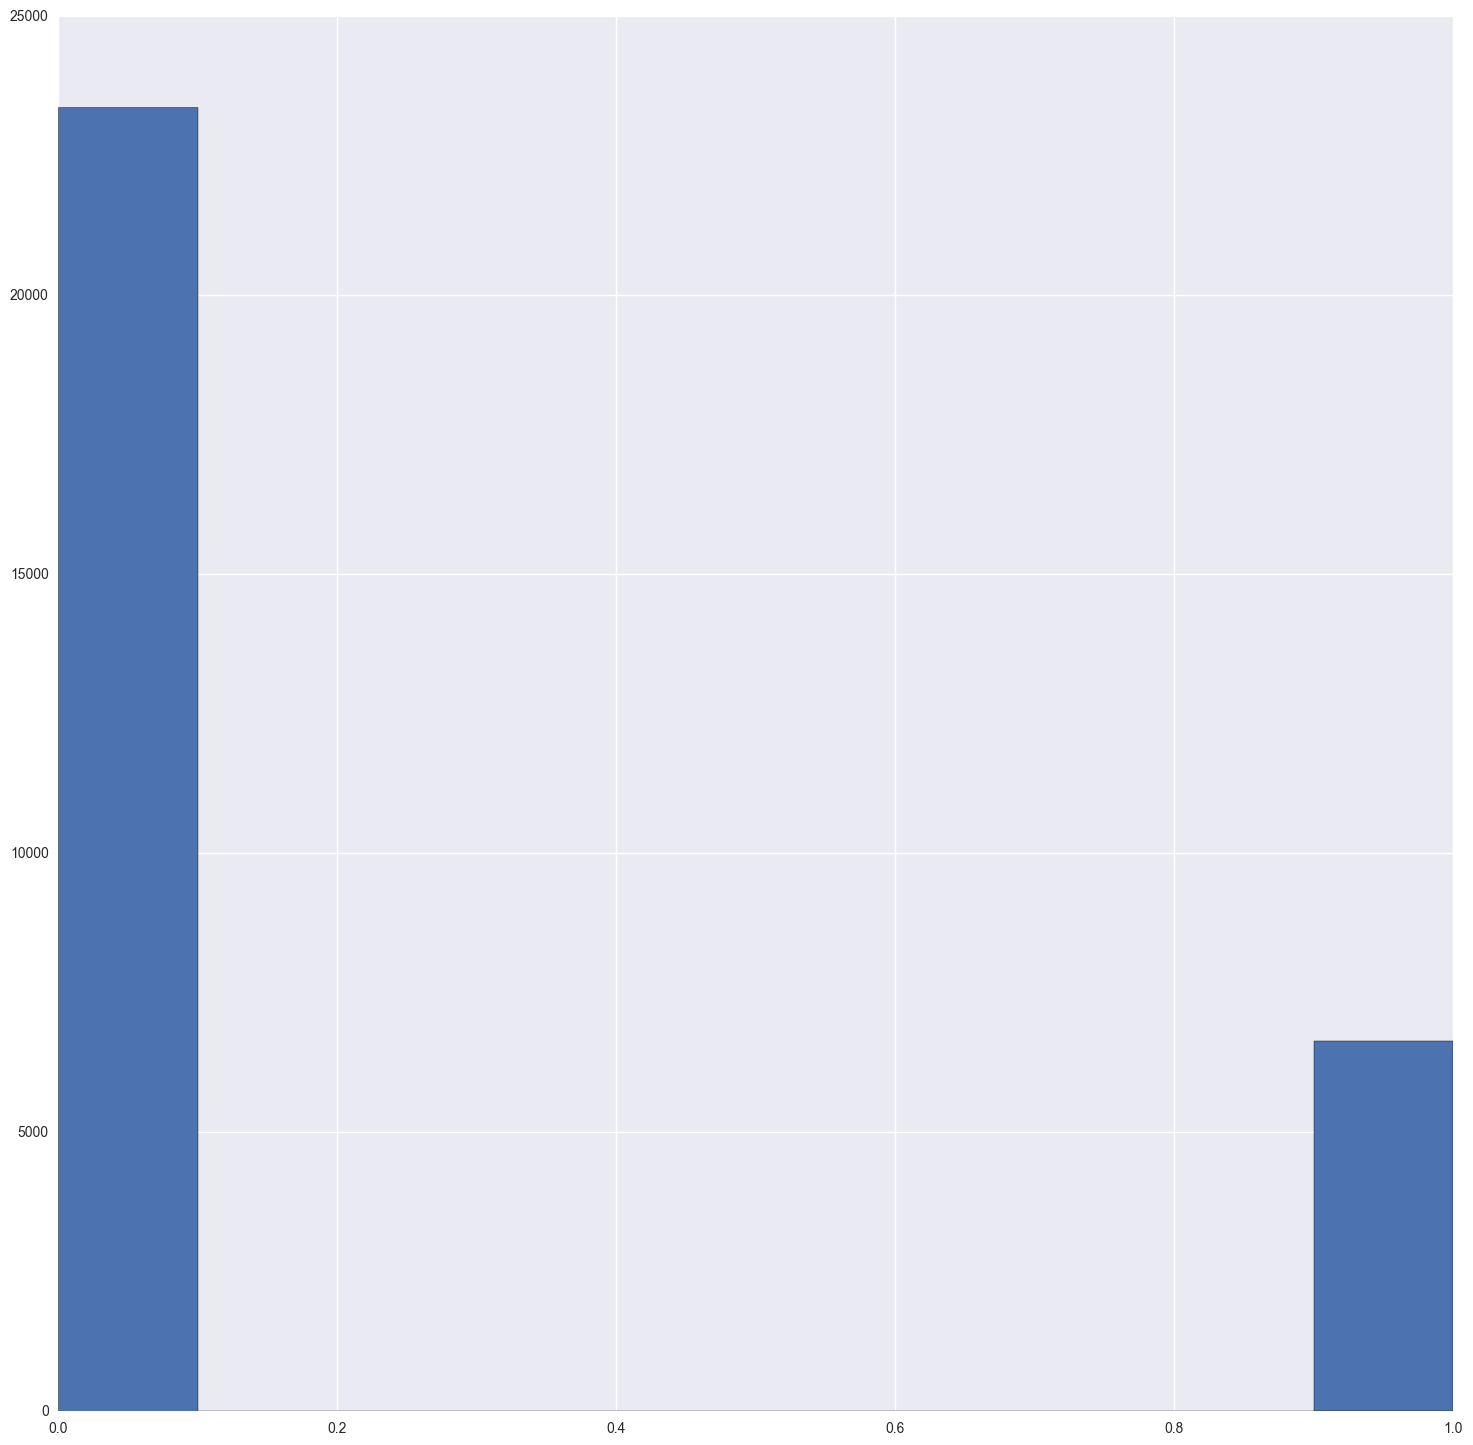

In [8]:
target.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF28908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C8F06D8>]], dtype=object)

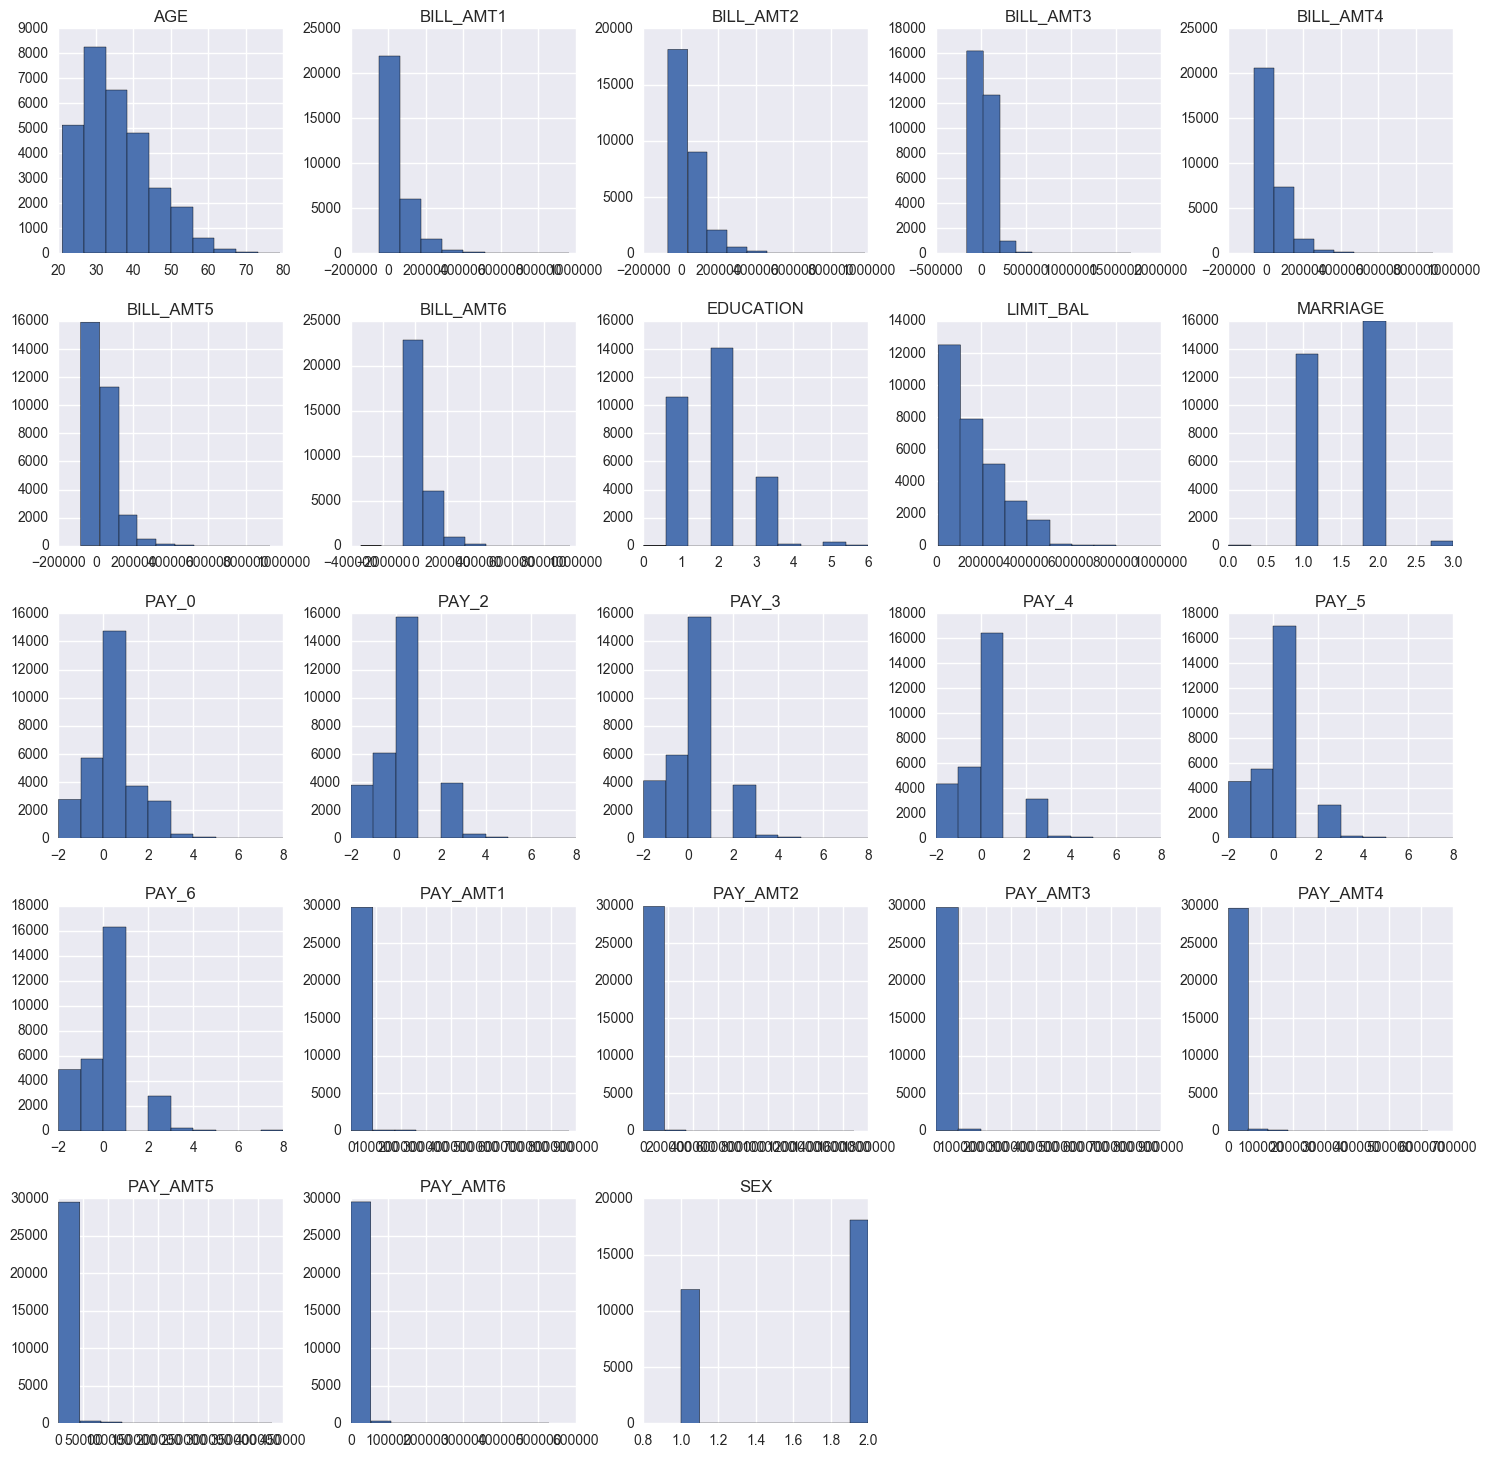

In [9]:
train.hist()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xcf70748>,
 'caps': [<matplotlib.lines.Line2D at 0xd36da58>,
 'fliers': [<matplotlib.lines.Line2D at 0xd2c5860>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd2fddd8>,
 'whiskers': [<matplotlib.lines.Line2D at 0xb480470>,
  <matplotlib.lines.Line2D at 0x10682be0>]}

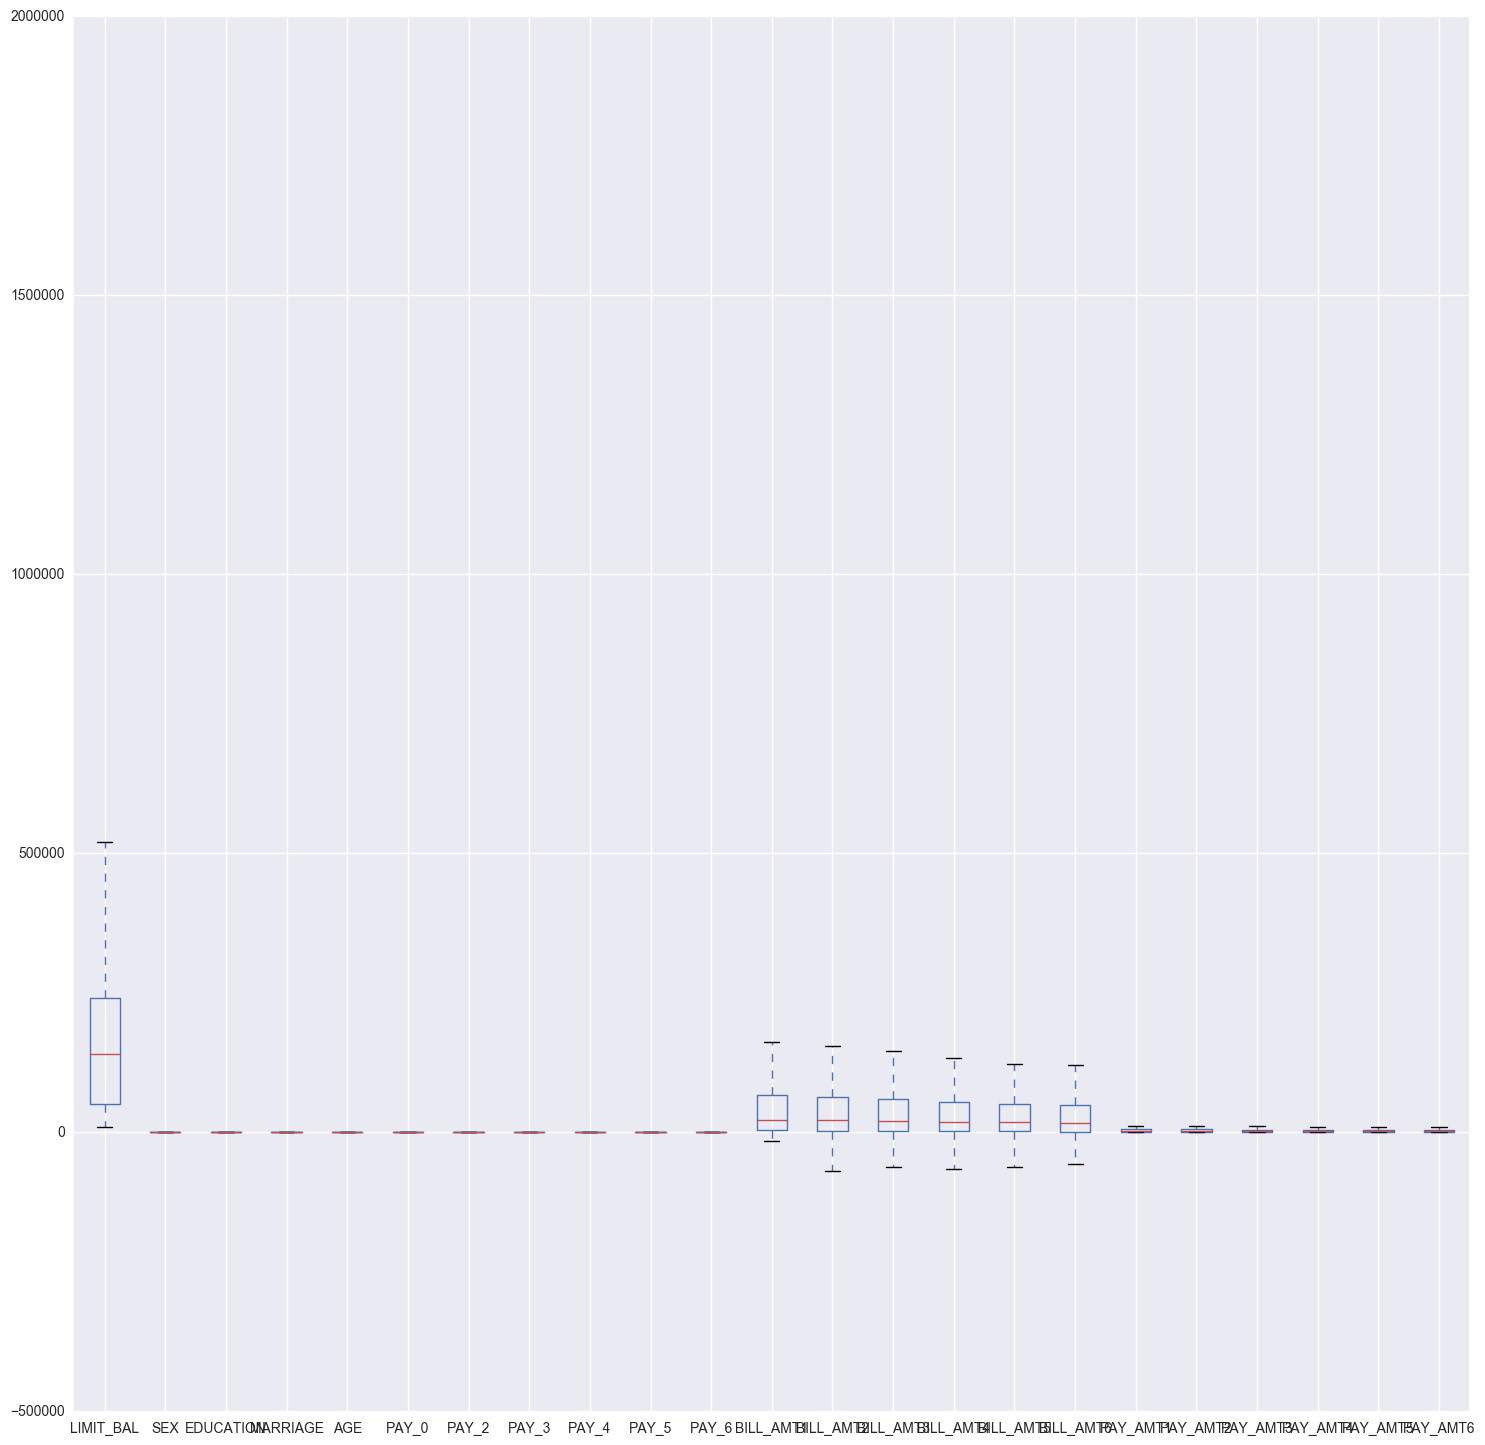

In [10]:
train.boxplot()

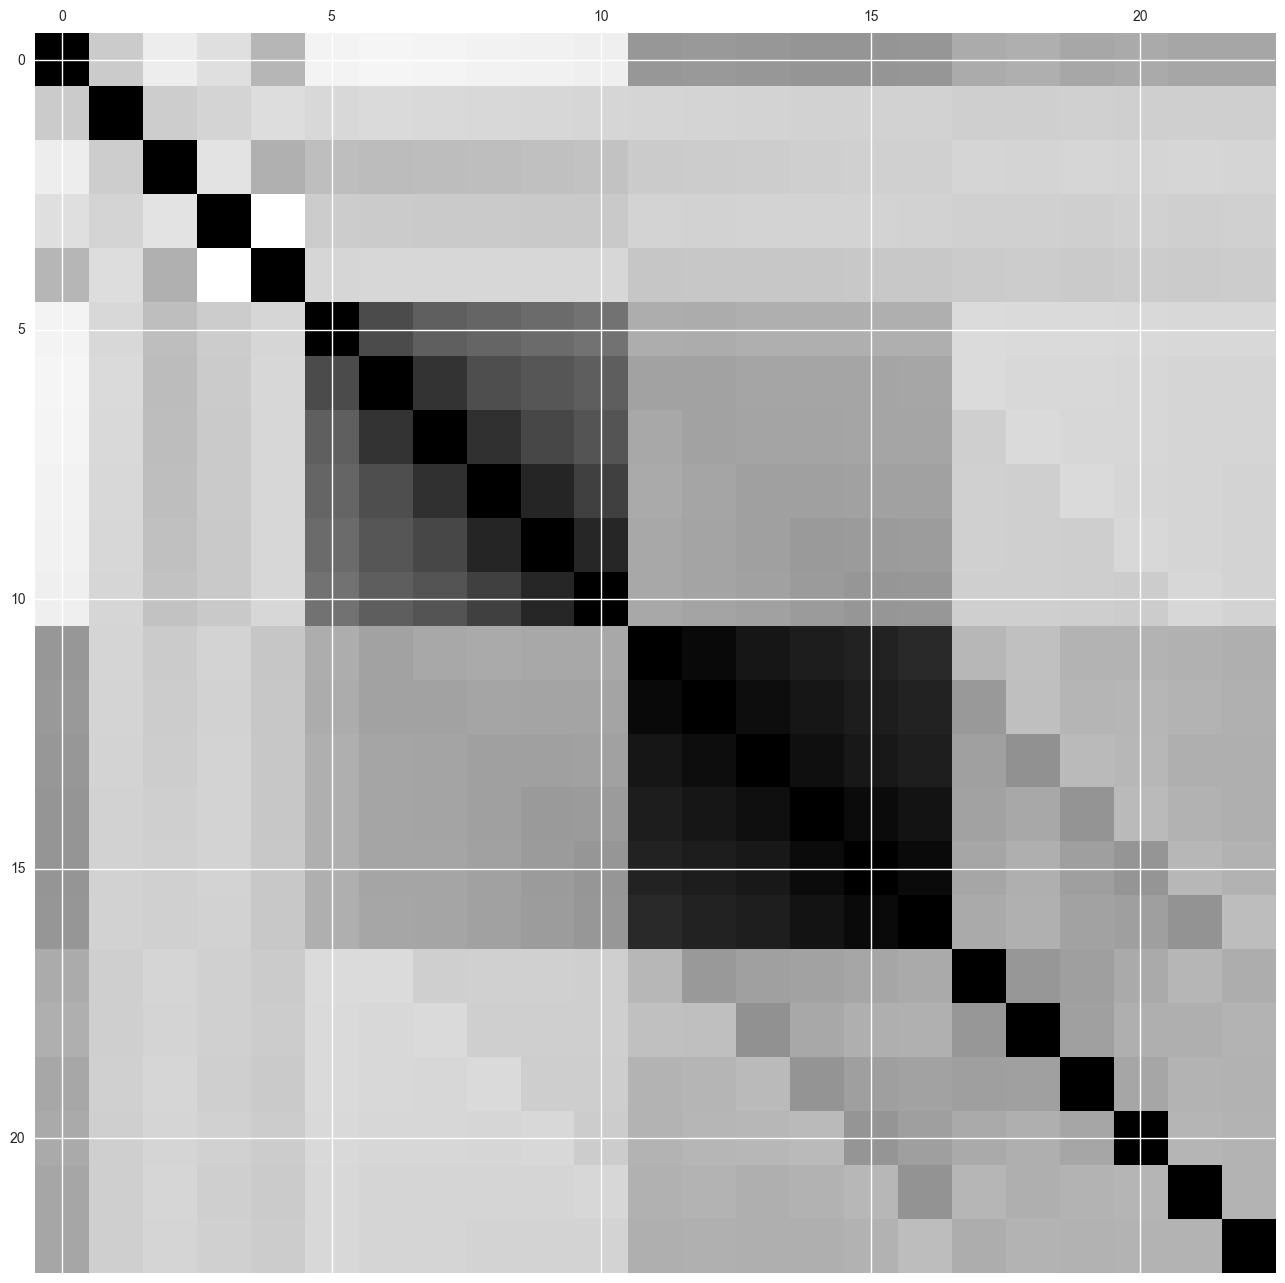

In [11]:
plt.matshow(train.corr())

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [13]:
tree.fit(train, target)
pd.DataFrame(data=[tree.feature_importances_],columns=train.columns).rename({0: 'importance'}).transpose().sort_values(by="importance",ascending = False)

,importance
PAY_0,0.161718
AGE,0.074140
BILL_AMT1,0.067863
LIMIT_BAL,0.058786
PAY_AMT3,0.056276
BILL_AMT2,0.053399
BILL_AMT6,0.053107
PAY_AMT1,0.051077
PAY_AMT5,0.048299
PAY_AMT6,0.047592


C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:589: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:595: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\patches.py:640: ComplexWarning: Casting complex values to real discards the imaginary part
  self._x = float(xy[0])
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\patches.py:642: ComplexWarning: Casting complex values to real discards the imaginary part
  self._width = float(width)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000110EAD68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014C4C5F8>]], dtype=object)

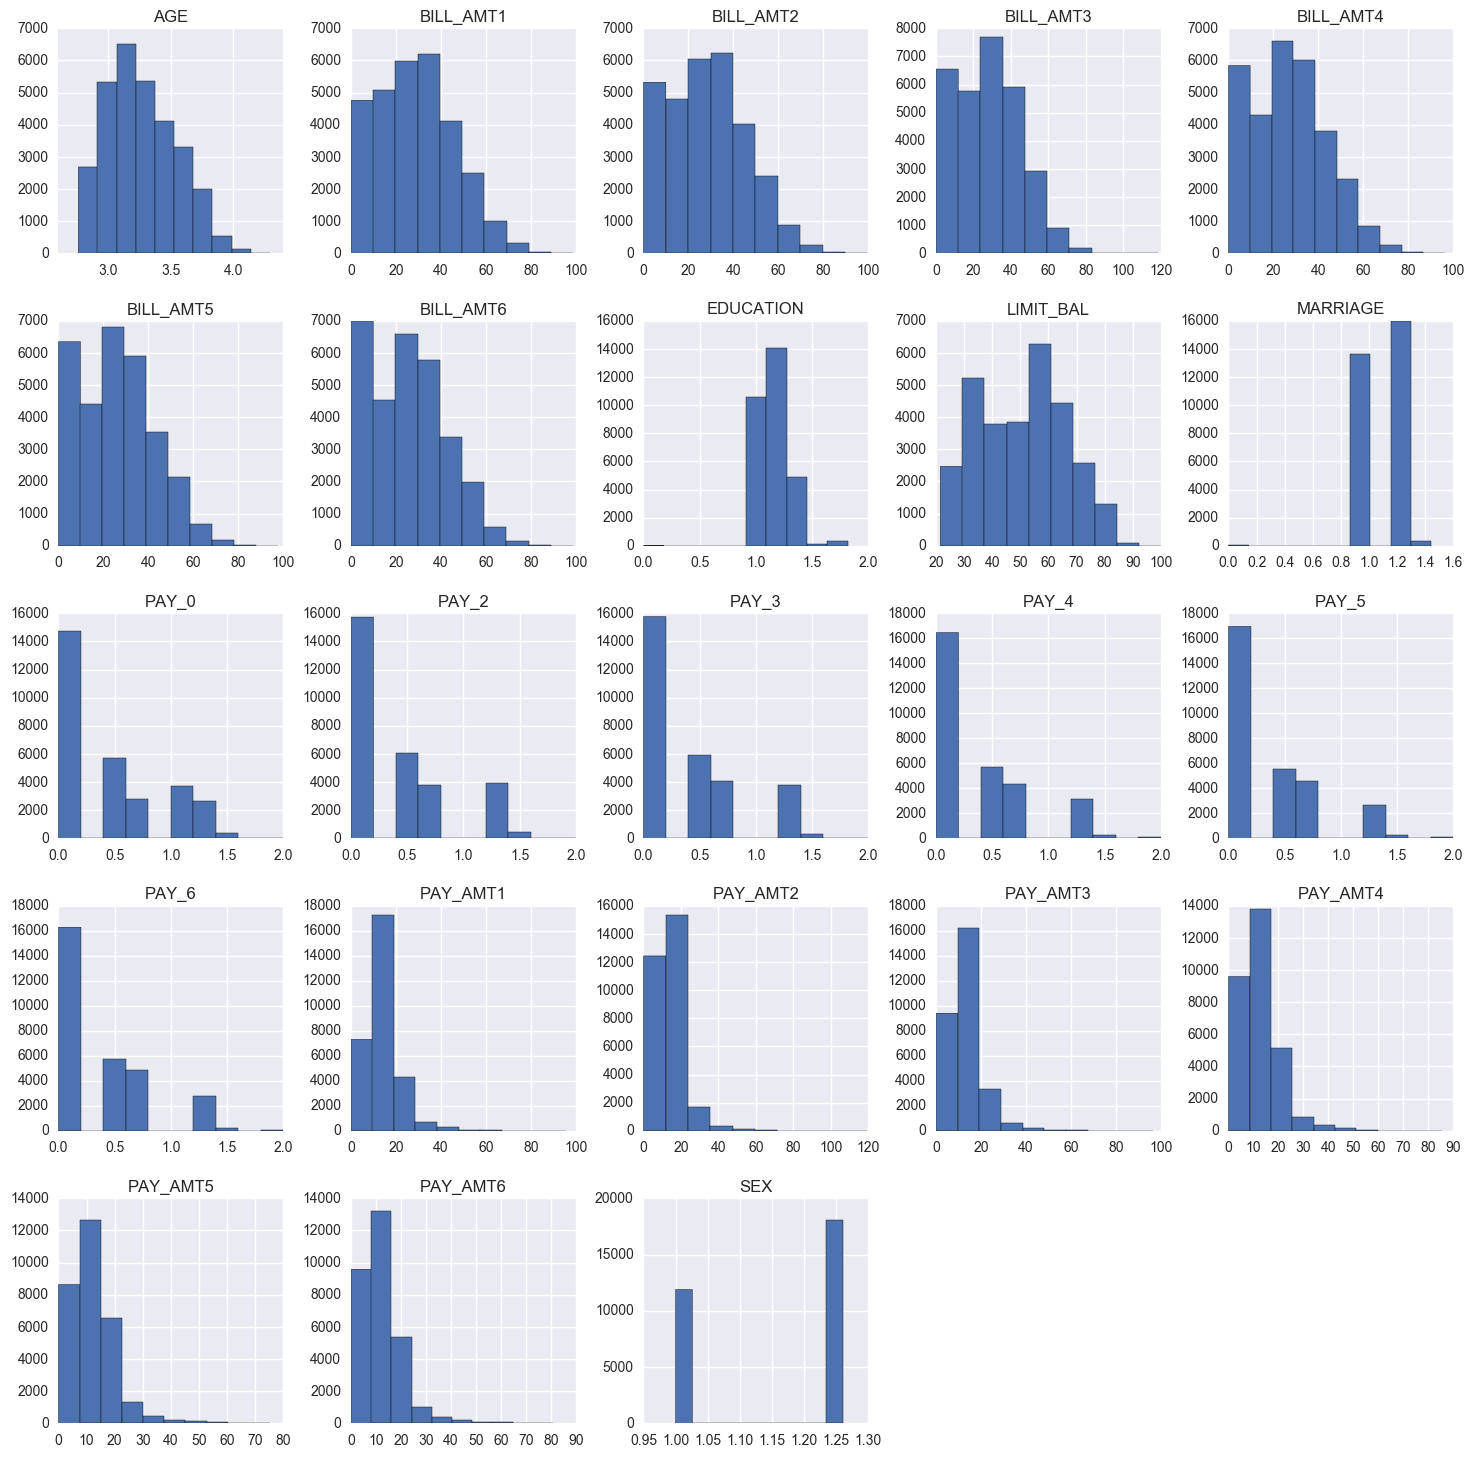

In [14]:
from numbers import Number
train.applymap(lambda x: x ** (1. / 3) if isinstance(x, Number) else x ).hist()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x1360c5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1359c0f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1361be10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1361b7b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1360c278>,
  <matplotlib.lines.Line2D at 0x13a70ba8>]}

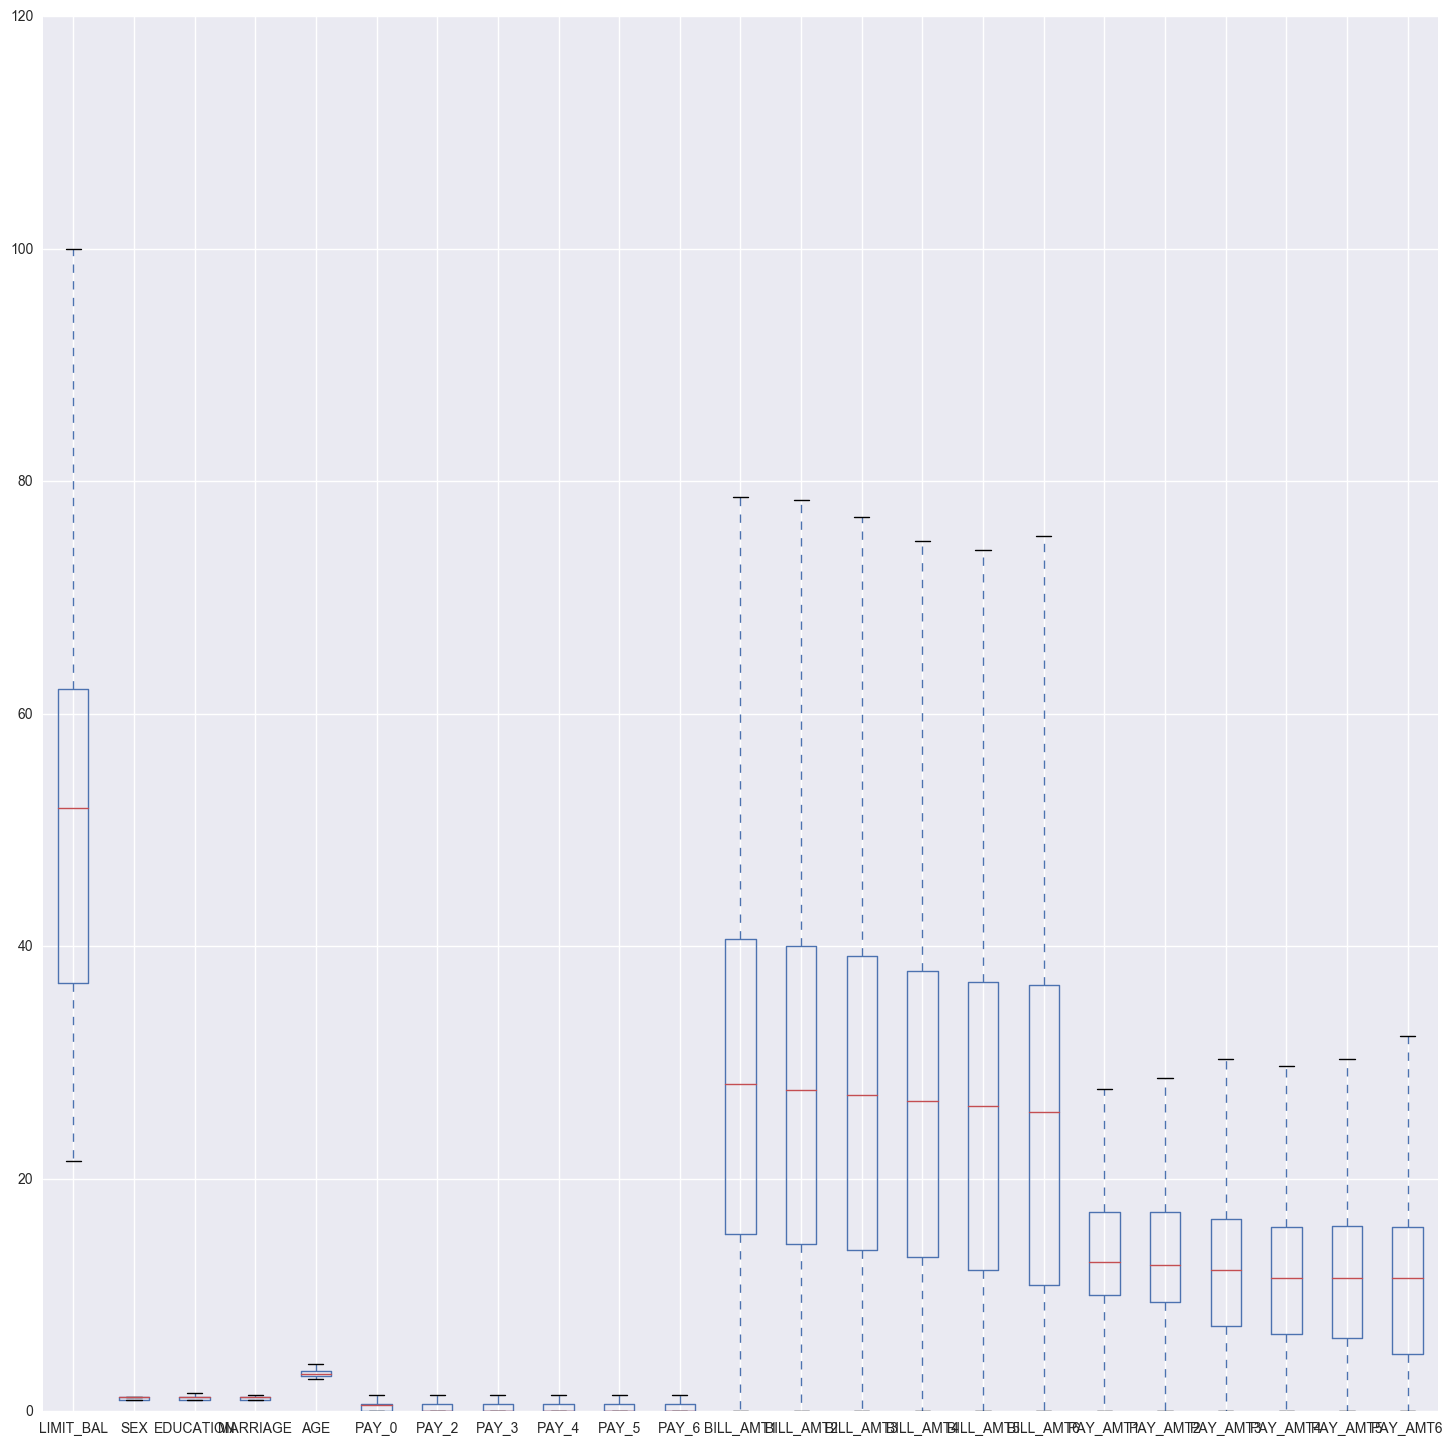

In [15]:
train.applymap(lambda x: x ** (1. / 3) if isinstance(x, Number) else x ).boxplot()